<a href="https://colab.research.google.com/github/vitoriapmaattos/dataanalytics/blob/main/Tech3_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O Problema: PNAD-COVID 19**

Fomos contratados por um grande hospital para entender o comportamento da população durante a pandemia de COVID-19 e identificar indicadores essenciais para o planejamento em caso de novos surtos.

Utilizamos a pesquisa PNAD-COVID-19 do IBGE (https://covid19.ibge.gov.br/pnad-covid/) e consideramos os últimos três meses como base de dados confiável.

A ideia é focar nas informações mais relevantes para responder ao problema, como dados sobre saúde, sintomas relatados, acesso a serviços médicos, situação de emprego e renda, além de variáveis que possam ajudar a prever o impacto em serviços hospitalares e recursos.
**Perguntas**

1. Caracterização dos sintomas clínicos da população;
2. Comportamento da população na época da COVID-19;
3. Características econômicas da Sociedade;

**Objetivo**
Nosso objetivo será apresentar uma análise concisa dessas informações, detalhando como o banco de dados foi estruturado, quais perguntas foram escolhidas para abordar o problema e quais ações principais o hospital deve implementar caso ocorra um novo surto de COVID-19.



**1. Leitura e processamentos dos dados**

In [ ]:
# Instale a biblioteca
!pip install google-cloud-bigquery

In [ ]:
#Instalando Biblioteca
!pip install pandas plotly

In [ ]:
# Autenticação
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Configurar cliente do BigQuery
from google.cloud import bigquery

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
#Instalando e importando o PySpark

!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql import functions as F
from pyspark.sql import Row

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=df05d9d1b8b29275aae6873f3addca134fd64a15748e93477fd82534f149c997
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
# Habilitar o uso do Apache Arrow
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [ ]:
# Criar o cliente BigQuery
client = bigquery.Client()

#ID do projeto
project_id = 'secret-timing-398503'

# Criar o cliente BigQuery com o ID do projeto
client = bigquery.Client(project=project_id)

**COLUNAS SELECIONADAS**

Dicionário de dados das colunas mantidas no dataframe
* ano: ano de referência
* sigla_uf: Sigla da Unidade da Federação
* A002: Idade
* A003: Sexo
* A004: Raça ou Cor
* A005: Escolaridade
* B0011: Na semana passada teve febre?
* B0012: Na semana passada teve tosse?
* B0013: Na semana passada teve dor de garganta?
* B0015: Na semana passada teve dor de cabeça?
* B00111: Na semana passada teve perda de cheiro ou sabor?
* B002: Por causa disso, foi a algum estabelecimento de saúde?
* C001: Na semana passada, por pelo menos uma hora, trabalhou ou fez algum bico?
* B011: Na semana passada, devido à pandemia do Coronavírus, em que medida o(a) Sr(a) restringiu o contato com as pessoas?
* C011A11: Número da faixa do rendimento/retirada em dinheiro.
* C007D: Qual é a principal atividade do local ou empresa em que você trabalha?
* B009B: Resultado exame COVID SWAB
* B009D: Resultado exame com furo no dedo
* B009F: Resultado exame com coleta de sangue na veia


In [ ]:
#Realizando a consulta
query = '''SELECT
                ano AS Ano,
                sigla_uf AS Estado,
                a002 AS Idade,
                a003 AS Sexo,
                a004 AS Raca_ou_Cor,
                a005 AS Escolaridade,
                v1022 AS Situacao_do_Domicilio,
                b0011 AS Teve_febre,
                b0015 AS Teve_dor_de_cabeca,
                b00111 AS Teve_perda_de_cheiro_ou_sabor,
                b002 AS Foi_a_algum_estabelecimento_de_saude,
                b011 AS Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas,
                c001 AS Trabalhou_ou_fez_algum_bico,
                c011a11 AS Faixa_do_rendimento_retirada_em_dinheiro,
                c007d AS Principal_atividade_de_trabalho,
                b009b AS Resultado_exame_COVID_SWAB,
                b009d AS Resultado_exame_com_furo_no_dedo,
                b009f AS Resultado_exame_com_coleta_de_sangue_na_veia
        FROM secret-timing-398503.Aulas_BigQuery.dds_Covid
 where mes in (9, 10, 11)  '''

query_job = client.query(query)  # Executa a consulta

#Obter os resultados e salvar no DataFrame
dados = query_job.result().to_dataframe()


In [ ]:
# Convertendo o DataFrame do Pandas para um DataFrame do PySpark
dados_spark = spark.createDataFrame(dados)

# Exibir o DataFrame do PySpark
dados_spark.show(5)

+----+------+-----+------+-----------+--------------------+---------------------+----------+------------------+-----------------------------+------------------------------------+----------------------------------------------------------+---------------------------+----------------------------------------+-------------------------------+--------------------------+--------------------------------+--------------------------------------------+
| Ano|Estado|Idade|  Sexo|Raca_ou_Cor|        Escolaridade|Situacao_do_Domicilio|Teve_febre|Teve_dor_de_cabeca|Teve_perda_de_cheiro_ou_sabor|Foi_a_algum_estabelecimento_de_saude|Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas|Trabalhou_ou_fez_algum_bico|Faixa_do_rendimento_retirada_em_dinheiro|Principal_atividade_de_trabalho|Resultado_exame_COVID_SWAB|Resultado_exame_com_furo_no_dedo|Resultado_exame_com_coleta_de_sangue_na_veia|
+----+------+-----+------+-----------+--------------------+---------------------+----------+------------------+-

In [ ]:
# Contando os nulos por coluna
nulos_por_coluna = dados_spark.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in dados_spark.columns])

# Mostrar o resultado
nulos_por_coluna.show()

+---+------+-----+----+-----------+------------+---------------------+----------+------------------+-----------------------------+------------------------------------+----------------------------------------------------------+---------------------------+----------------------------------------+-------------------------------+--------------------------+--------------------------------+--------------------------------------------+
|Ano|Estado|Idade|Sexo|Raca_ou_Cor|Escolaridade|Situacao_do_Domicilio|Teve_febre|Teve_dor_de_cabeca|Teve_perda_de_cheiro_ou_sabor|Foi_a_algum_estabelecimento_de_saude|Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas|Trabalhou_ou_fez_algum_bico|Faixa_do_rendimento_retirada_em_dinheiro|Principal_atividade_de_trabalho|Resultado_exame_COVID_SWAB|Resultado_exame_com_furo_no_dedo|Resultado_exame_com_coleta_de_sangue_na_veia|
+---+------+-----+----+-----------+------------+---------------------+----------+------------------+-----------------------------+----

**RESULTADOS POSITIVOS**

Construímos uma consulta, visando analisar apenas os casos positivos de COVID-19 identificados por três métodos de exame: swab, furo no dedo e coleta de sangue na veia.

In [ ]:
#Criando uma visualização temporária
dados_spark.createOrReplaceTempView('dados_spark')

In [ ]:
#Realizando a consulta
dados_agrupados = spark.sql("""
    SELECT
        Ano,
        Estado,
        CAST(Idade AS FLOAT) AS Idade,
        Sexo,
        Raca_ou_Cor,
        Escolaridade,
        Situacao_do_Domicilio,
        Teve_febre,
        Teve_dor_de_cabeca,
        Teve_perda_de_cheiro_ou_sabor,
        Foi_a_algum_estabelecimento_de_saude,
        Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas,
        Trabalhou_ou_fez_algum_bico,
        Faixa_do_rendimento_retirada_em_dinheiro,
        Principal_atividade_de_trabalho
    FROM dados_spark
    WHERE Resultado_exame_COVID_SWAB = 'Positivo'
    OR Resultado_exame_com_furo_no_dedo = 'Positivo'
    OR Resultado_exame_com_coleta_de_sangue_na_veia = 'Positivo'
""")

Com esse novo dataframe podemos realizar análises mais aprofundadas, como estudo de sintomas, faixas etárias afetadas, distribuição geográfica, entre outros aspectos relacionados à pandemia.

**Incluíndo dados de latitude e longitude**

In [ ]:
#DataFrame de coordenadas
data = [
    Row(Estado='AC', Latitude=-8.774, Longitude=-70.5558),
    Row(Estado='AL', Latitude=-9.6658, Longitude=-36.2299),
    Row(Estado='AP', Latitude=1.4114, Longitude=-51.0773),
    Row(Estado='AM', Latitude=-3.4169, Longitude=-65.8561),
    Row(Estado='BA', Latitude=-12.5797, Longitude=-41.7001),
    Row(Estado='CE', Latitude=-5.5019, Longitude=-39.3043),
    Row(Estado='DF', Latitude=-15.7801, Longitude=-47.9292),
    Row(Estado='ES', Latitude=-20.3155, Longitude=-40.3128),
    Row(Estado='GO', Latitude=-15.8272, Longitude=-49.1406),
    Row(Estado='MA', Latitude=-5.4223, Longitude=-45.4424),
    Row(Estado='MT', Latitude=-12.6819, Longitude=-55.4011),
    Row(Estado='MS', Latitude=-20.442, Longitude=-54.6466),
    Row(Estado='MG', Latitude=-18.5122, Longitude=-44.555),
    Row(Estado='PA', Latitude=-5.856, Longitude=-52.2866),
    Row(Estado='PB', Latitude=-7.2302, Longitude=-35.8817),
    Row(Estado='PR', Latitude=-24.7893, Longitude=-51.6460),
    Row(Estado='PE', Latitude=-8.3284, Longitude=-36.6824),
    Row(Estado='PI', Latitude=-7.5329, Longitude=-41.7385),
    Row(Estado='RJ', Latitude=-22.9083, Longitude=-43.1964),
    Row(Estado='RN', Latitude=-5.7945, Longitude=-36.6003),
    Row(Estado='RS', Latitude=-30.0178, Longitude=-51.2287),
    Row(Estado='RO', Latitude=-11.2555, Longitude=-62.7750),
    Row(Estado='RR', Latitude=2.8125, Longitude=-60.7033),
    Row(Estado='SC', Latitude=-27.3350, Longitude=-50.7775),
    Row(Estado='SP', Latitude=-23.5505, Longitude=-46.6333),
    Row(Estado='SE', Latitude=-10.9472, Longitude=-37.0731),
    Row(Estado='TO', Latitude=-10.2476, Longitude=-48.3330)
]

coordenadas_df = spark.createDataFrame(data)

#Convertendo para Pandas
coordenadas_df_pd = coordenadas_df.toPandas()

**2. Análise exploratória**

In [ ]:
#Consulta de variáveis
%whos

Variable            Type            Data/Info
---------------------------------------------
F                   module          <module 'pyspark.sql.func<...>yspark/sql/functions.py'>
Row                 type            <class 'pyspark.sql.types.Row'>
SparkSession        type            <class 'pyspark.sql.session.SparkSession'>
auth                module          <module 'google.colab.aut<...>es/google/colab/auth.py'>
bigquery            module          <module 'google.cloud.big<...>ud/bigquery/__init__.py'>
client              Client          <google.cloud.bigquery.cl<...>object at 0x7c8748fcff10>
coordenadas_df      DataFrame       DataFrame[Estado: string,<...>ouble, Longitude: double]
coordenadas_df_pd   DataFrame          Estado  Latitude  Long<...>  TO  -10.2476   -48.3330
dados               DataFrame                 Ano Estado Idad<...>149197 rows x 18 columns]
dados_agrupados     DataFrame       DataFrame[Ano: bigint, Es<...>dade_de_trabalho: string]
dados_spark         DataF

In [ ]:
#Visualizando o dataframe com os resultados positivos
dados_agrupados.show()

+----+------+-----+------+-----------+--------------------+---------------------+----------+------------------+-----------------------------+------------------------------------+----------------------------------------------------------+---------------------------+----------------------------------------+-------------------------------+
| Ano|Estado|Idade|  Sexo|Raca_ou_Cor|        Escolaridade|Situacao_do_Domicilio|Teve_febre|Teve_dor_de_cabeca|Teve_perda_de_cheiro_ou_sabor|Foi_a_algum_estabelecimento_de_saude|Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas|Trabalhou_ou_fez_algum_bico|Faixa_do_rendimento_retirada_em_dinheiro|Principal_atividade_de_trabalho|
+----+------+-----+------+-----------+--------------------+---------------------+----------+------------------+-----------------------------+------------------------------------+----------------------------------------------------------+---------------------------+----------------------------------------+----------------

In [ ]:
#Criando uma visualização temporária
dados_agrupados.createOrReplaceTempView('dados_agrupados')

Optamos por agrupar os dados, pois desa forma conseguimos estruturar e analisar os dados de uma forma mais compreensivel. Cada um dos agrupamentos atende a uma finalidade específica para compreender diferentes aspectos dos **casos positivos de COVID-19**.


**• Agrupamento por sexo e média de idade:**




In [ ]:
dados_agrupados_por_sexo = spark.sql("""
    SELECT
        Sexo,
        count(Sexo) as contagem_sexo,
        round(AVG (cast(Idade as int)),0) as media_idade,
        max(cast(Idade as int)) as maior_idade,
        min(cast(Idade as int)) as menor_idade
    FROM dados_agrupados
group by Sexo
""").toPandas()

print(dados_agrupados_por_sexo)

     Sexo  contagem_sexo  media_idade  maior_idade  menor_idade
0   Homem          14711         41.0          102            0
1  Mulher          18211         41.0          102            0


In [ ]:
dados_agrupados_estudo_idade = spark.sql("""
    SELECT
        DISTINCT CAST(Idade AS INT) AS Idade
    FROM dados_agrupados
    ORDER BY Idade ASC
""")

dados_agrupados_estudo_idade.show()

+-----+
|Idade|
+-----+
|    0|
|    1|
|    2|
|    3|
|    4|
|    5|
|    6|
|    7|
|    8|
|    9|
|   10|
|   11|
|   12|
|   13|
|   14|
|   15|
|   16|
|   17|
|   18|
|   19|
+-----+
only showing top 20 rows



In [ ]:
print(dados_agrupados.dtypes)

[('Ano', 'bigint'), ('Estado', 'string'), ('Idade', 'float'), ('Sexo', 'string'), ('Raca_ou_Cor', 'string'), ('Escolaridade', 'string'), ('Situacao_do_Domicilio', 'string'), ('Teve_febre', 'string'), ('Teve_dor_de_cabeca', 'string'), ('Teve_perda_de_cheiro_ou_sabor', 'string'), ('Foi_a_algum_estabelecimento_de_saude', 'string'), ('Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas', 'string'), ('Trabalhou_ou_fez_algum_bico', 'string'), ('Faixa_do_rendimento_retirada_em_dinheiro', 'string'), ('Principal_atividade_de_trabalho', 'string')]


**• Agrupamento por estado:**

In [ ]:
dados_agrupados_por_estado = spark.sql("""

    SELECT
        Estado,
        count(Estado) as contagem_estado
    FROM dados_agrupados
group by Estado
order by contagem_estado desc

""").toPandas()

print(dados_agrupados_por_estado)

   Estado  contagem_estado
0      SP             2245
1      RJ             2177
2      MA             2168
3      GO             2053
4      SC             1662
5      CE             1578
6      AM             1491
7      MG             1487
8      ES             1427
9      PA             1301
10     MT             1288
11     RR             1252
12     RS             1172
13     DF             1131
14     BA             1098
15     PR             1082
16     PI             1042
17     AL              997
18     SE              853
19     PE              826
20     PB              816
21     RN              714
22     AC              687
23     MS              656
24     RO              601
25     TO              583
26     AP              535


In [ ]:
# Unindo os DataFrames
dados_agrupados_com_coordenadas = dados_agrupados_por_estado.merge(coordenadas_df_pd, on='Estado', how='left')

**• Agrupamento por faixa salarial:**

In [ ]:
dados_faixa_salarial_distinta = spark.sql("""

    SELECT
    count(Faixa_do_rendimento_retirada_em_dinheiro) as contagem_positivos,
       Faixa_do_rendimento_retirada_em_dinheiro
    FROM dados_agrupados
where Faixa_do_rendimento_retirada_em_dinheiro is not null
group by Faixa_do_rendimento_retirada_em_dinheiro
order by 1 desc


""").toPandas()

print(dados_faixa_salarial_distinta)

   contagem_positivos Faixa_do_rendimento_retirada_em_dinheiro
0                7706                              801 - 1.600
1                4820                            1.601 - 3.000
2                3553                           3.001 - 10.000
3                 824                                301 - 600
4                 613                          10.001 - 50.000
5                 562                                601 - 800
6                 458                                  0 - 100
7                 381                                101 - 300
8                   4                         50.001 - 100.000


**• Agrupamento por atividade de trabalho:**



In [ ]:
dados_agrupados_atividade = spark.sql("""

    SELECT
    count(Principal_atividade_de_trabalho) as contagem_positivos,
       Principal_atividade_de_trabalho
    FROM dados_agrupados
where Principal_atividade_de_trabalho is not null
group by Principal_atividade_de_trabalho
order by 1 desc


""").toPandas()

print(dados_agrupados_atividade)

    contagem_positivos                    Principal_atividade_de_trabalho
0                 3319                  Saúde humana e assistência social
1                 2474                      Comércio no atacado e varejo;
2                 1768  Administração pública (governo federal, estadu...
3                 1572                                           Educação
4                 1306  Indústria da transformação (inclusive confecçã...
5                 1149                                              Outro
6                 1007  Agricultura, pecuária, produção florestal e pesca
7                  784  Serviço de alimentação (bares, restaurantes, a...
8                  766                                         Construção
9                  651  Serviço doméstico remunerado (será imputado da...
10                 572  Escritórios de advocacia, engenharia, publicid...
11                 567  Atividades de locação de mão de obra, seguranç...
12                 387                

**• Sintomas atendidos em postos de saúde:**

In [ ]:
dados_agrupados_posto_saude = spark.sql("""

    SELECT
    SUM(case when Teve_febre = 'Sim' then 1 else 0 end) as Teve_febre,
    SUM(case when Teve_dor_de_cabeca = 'Sim' then 1 else 0 end) as Teve_dor_de_cabeca,
    SUM(case when Teve_perda_de_cheiro_ou_sabor = 'Sim' then 1 else 0 end) as Teve_perda_de_cheiro_ou_sabor
    FROM dados_agrupados
WHERE Foi_a_algum_estabelecimento_de_saude = 'Sim'

""").toPandas()

print(dados_agrupados_posto_saude)

   Teve_febre  Teve_dor_de_cabeca  Teve_perda_de_cheiro_ou_sabor
0        1475                1624                           1322


In [ ]:
#Visualização distinta dos dados presentes na coluna para estudo

dados_agrupados_posto_restrição = spark.sql("""

    SELECT
    distinct (Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas)
    FROM dados_agrupados


""")

dados_agrupados_posto_restrição.show()

+----------------------------------------------------------+
|Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas|
+----------------------------------------------------------+
|                                      Ficou rigorosamen...|
|                                                  Ignorado|
|                                      Reduziu o contato...|
|                                      Ficou em casa e s...|
|                                      Não fez restrição...|
+----------------------------------------------------------+



**• Agrupamento por tipo de restrição de contato:**

In [ ]:
dados_agrupados_por_restrição = spark.sql("""

    SELECT
    Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas,
    count(Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas)
    FROM dados_agrupados
    group by 1
    order by 2 desc

""").toPandas()

print(dados_agrupados_por_restrição)

  Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas  \
0  Reduziu o contato com as pessoas, mas continuo...           
1  Ficou em casa e só saiu em caso de necessidade...           
2                        Ficou rigorosamente em casa           
3  Não fez restrição, levou vida normal como ante...           
4                                           Ignorado           

   count(Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas)  
0                                              16947                  
1                                              10123                  
2                                               3586                  
3                                               2198                  
4                                                 68                  


**• Agrupamento por restrição e atividade de trabalho:**

In [ ]:
dados_agrupados_restrição_trabalho = spark.sql("""

    SELECT
    Principal_atividade_de_trabalho,
   count(Principal_atividade_de_trabalho)
    FROM dados_agrupados
  where Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas in ('Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas', 'Não fez restrição, levou vida normal como antes da pandemia')
  and Principal_atividade_de_trabalho is not null
group by 1
order by 2 desc
""").toPandas()

print(dados_agrupados_restrição_trabalho)

                      Principal_atividade_de_trabalho  \
0                   Saúde humana e assistência social   
1                       Comércio no atacado e varejo;   
2   Administração pública (governo federal, estadu...   
3   Indústria da transformação (inclusive confecçã...   
4                                            Educação   
5                                               Outro   
6   Agricultura, pecuária, produção florestal e pesca   
7                                          Construção   
8   Serviço de alimentação (bares, restaurantes, a...   
9   Serviço doméstico remunerado (será imputado da...   
10  Atividades de locação de mão de obra, seguranç...   
11  Escritórios de advocacia, engenharia, publicid...   
12                          Transporte de mercadorias   
13                          Transporte de passageiros   
14  Cabeleireiros, tratamento de beleza e serviços...   
15        Bancos, atividades financeiras e de seguros   
16  Informação e comunicação (j

**• Agrupamento por histórico de trabalho (trabalhou ou fez bico):**

In [ ]:
dados_agrupados_qtd_trabalhou = spark.sql("""
    SELECT
    Trabalhou_ou_fez_algum_bico,
   count(Trabalhou_ou_fez_algum_bico)
    FROM dados_agrupados
    where Trabalhou_ou_fez_algum_bico is not null
group by 1
order by 2 desc
""").toPandas()

print(dados_agrupados_qtd_trabalhou)

  Trabalhou_ou_fez_algum_bico  count(Trabalhou_ou_fez_algum_bico)
0                         Sim                               17357
1                         Não                               13785


**3. Visualização de Dados**

**Quantidade de Testes Positivos no Dataframe**

In [ ]:
Positivos = dados_agrupados.count()
print(f"A quantidade total de testes positivos é: {Positivos}")


A quantidade total de testes positivos é: 32922


**Testes positivos por Sexo**

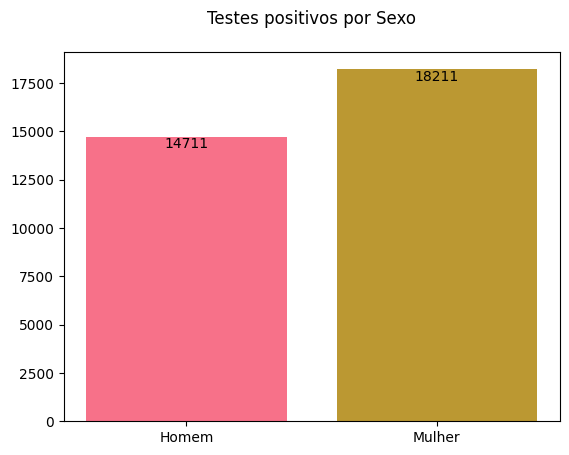

In [ ]:
colors = sns.color_palette('husl')

# Gráfico de Barras
bars = plt.bar(
    dados_agrupados_por_sexo['Sexo'],
    dados_agrupados_por_sexo['contagem_sexo'],
    color=colors
)


# Rótulo de dados
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 15,
        yval,
        ha='center',
        va='top',
        fontsize=10,
        color='black'
    )

# Titulo
plt.title('Testes positivos por Sexo', pad=20)

# Removendo a grade vertical
plt.grid(axis='x', linestyle='', alpha=0.7)

# Exibindo o gráfico
plt.show()

**Média de Idade dos testes positivos**

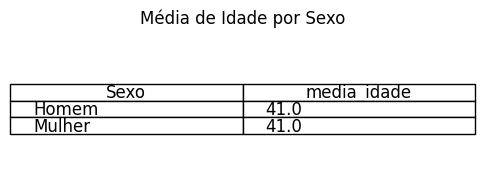

In [ ]:
dados_tabela = dados_agrupados_por_sexo[['Sexo', 'media_idade']]

# Tabela
fig, ax = plt.subplots(figsize=(6, 2))


ax.axis('tight')
ax.axis('off')


table = ax.table(cellText=dados_tabela.values,
                 colLabels=dados_tabela.columns,
                 cellLoc='left',
                 loc='center')

# Estilizando a tabela
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1)

# Exibindo a tabela
plt.title('Média de Idade por Sexo')
plt.show()

**Mapa de Testes Positivos**

In [ ]:
# Gráfico de mapa de densidade
grafico = px.density_mapbox(
    dados_agrupados_com_coordenadas,
    lon='Longitude',
    lat='Latitude',
    z='contagem_estado',
    mapbox_style='open-street-map',
    zoom=3.1,
    radius=30
)

# Atualizando layout do gráfico
grafico.update_layout(margin={"r": 0, "t": 0, "b": 0, "l": 0})

# Exibir o gráfico
grafico.show()

**Testes positivos por Faixa Salarial**

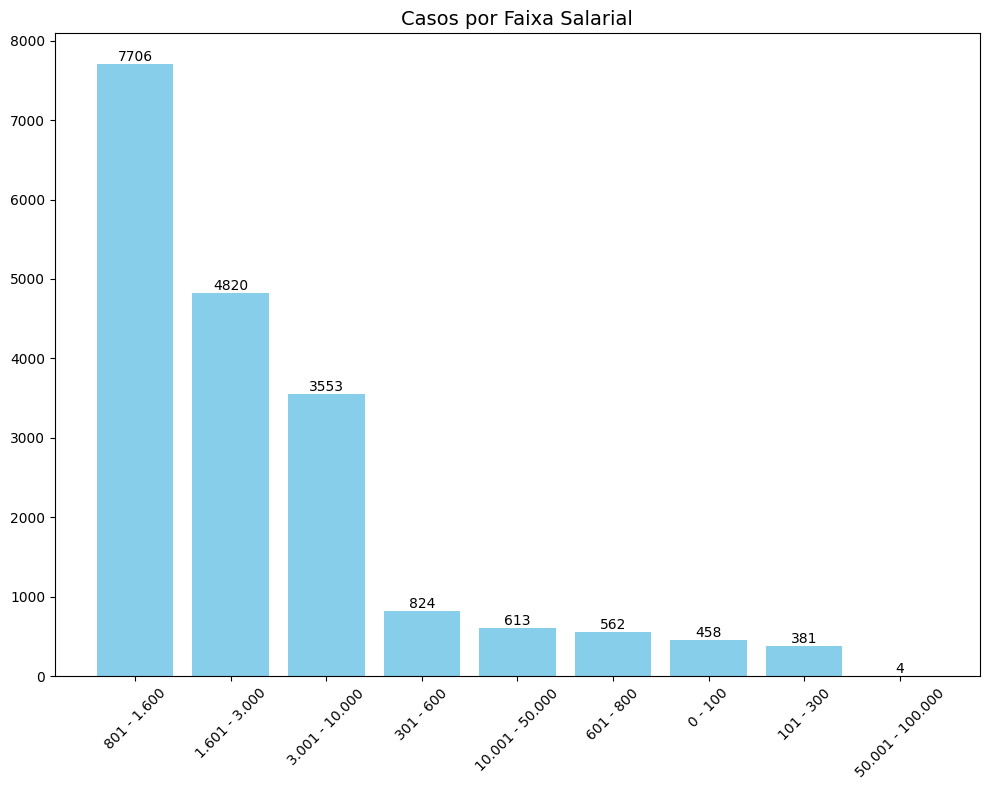

In [ ]:
# Gráfico de Barras
plt.figure(figsize=(10, 8))
bars = plt.bar(
    dados_faixa_salarial_distinta['Faixa_do_rendimento_retirada_em_dinheiro'],
    dados_faixa_salarial_distinta['contagem_positivos'],
    color='skyblue'
)

plt.title('Casos por Faixa Salarial', fontsize=14)

# Rótulo de dados
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,
        yval,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Removendo a grade vertical
plt.grid(axis='x', linestyle='', alpha=0.7)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Principal Atividiade do Trabalho**

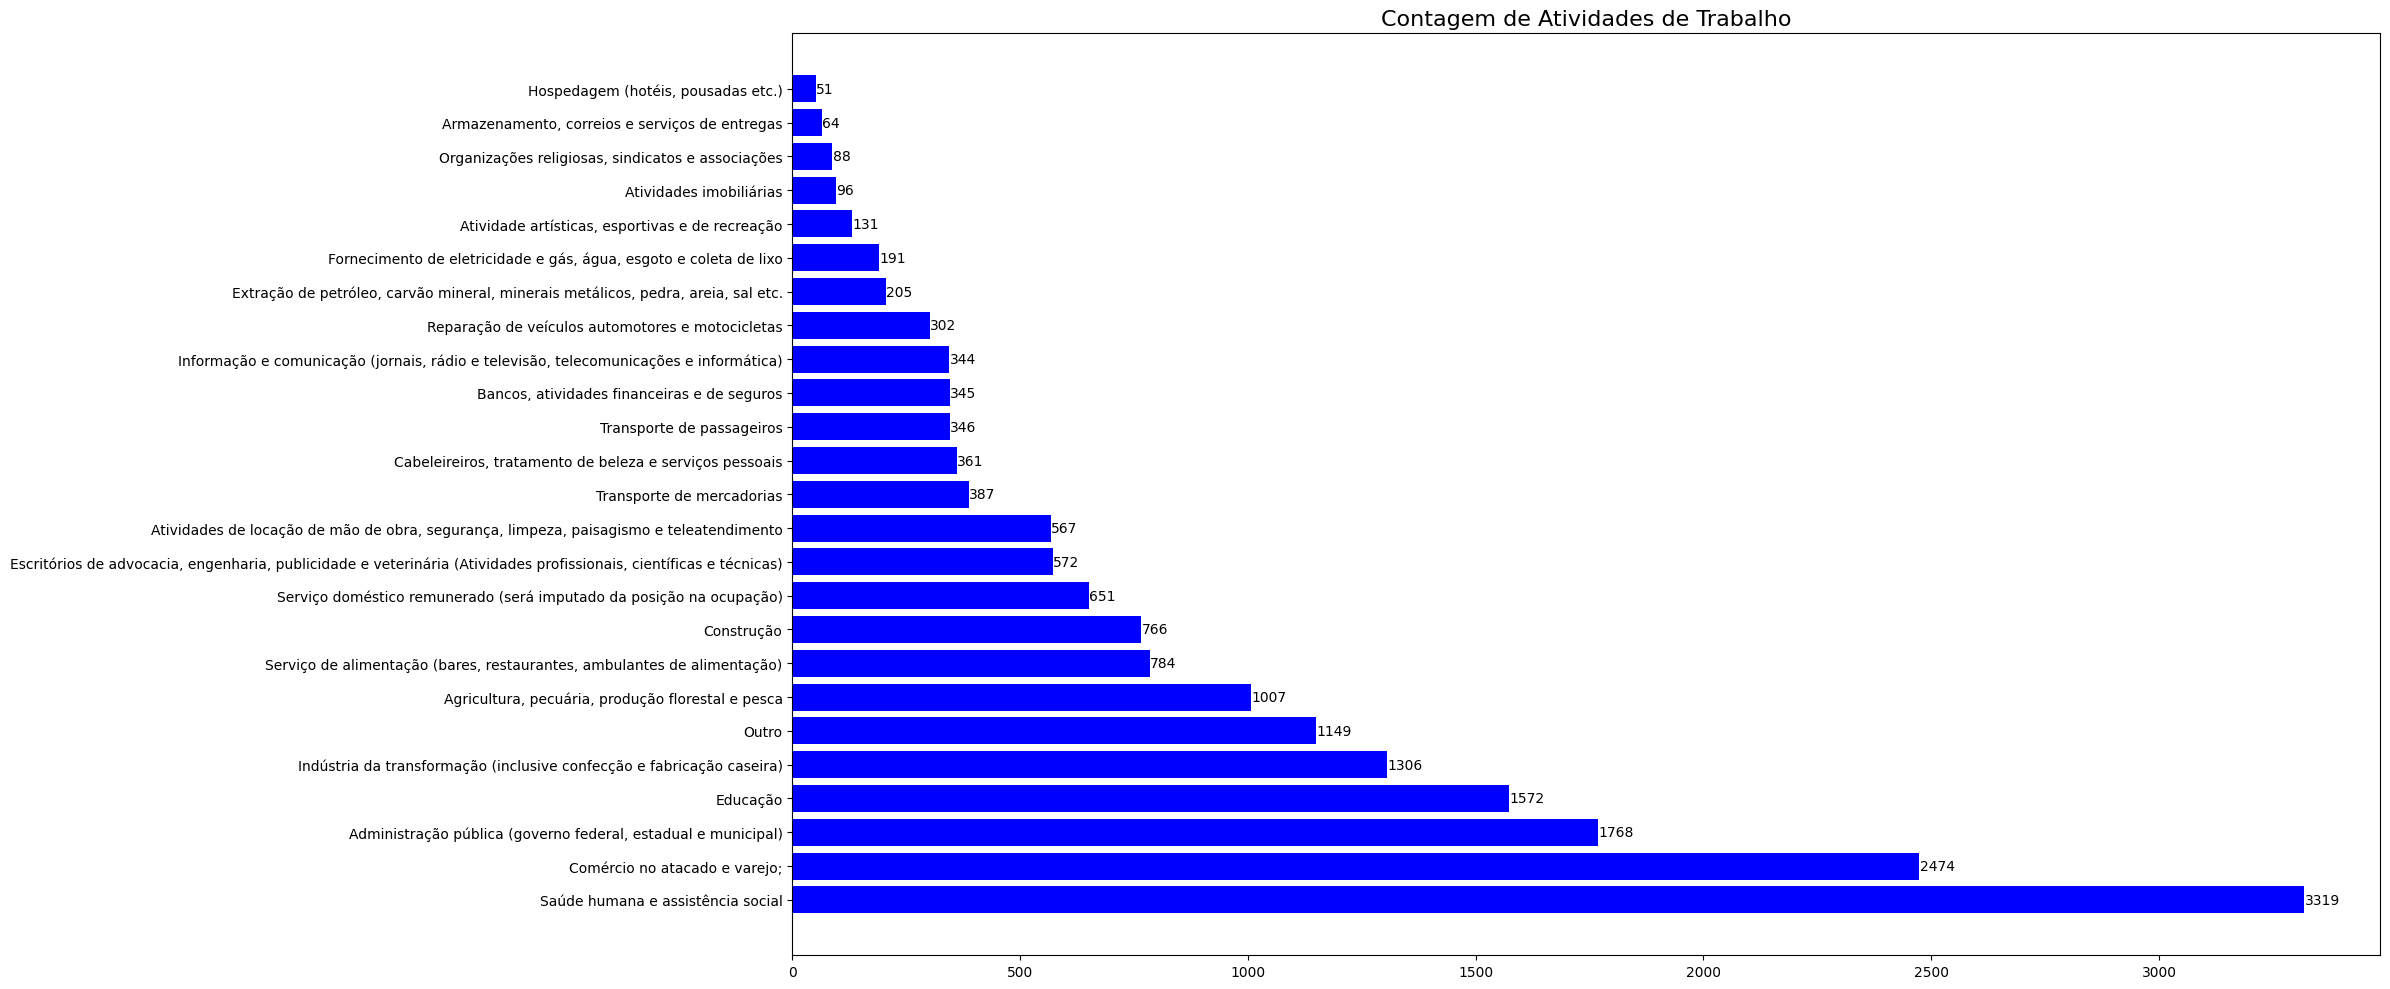

In [ ]:
# Gráfico de barras horizontal
plt.figure(figsize=(24, 10))
bars = plt.barh(
    dados_agrupados_atividade['Principal_atividade_de_trabalho'],
    dados_agrupados_atividade['contagem_positivos'],
    color='blue'
)

# Rótulo de dados
for bar in bars:
    plt.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        bar.get_width(),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Removendo a grade horizontal
plt.grid(axis='y', linestyle='', alpha=0.7)

# Título
plt.title('Contagem de Atividades de Trabalho', fontsize=16)

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Atendidos em unidades de saúde**

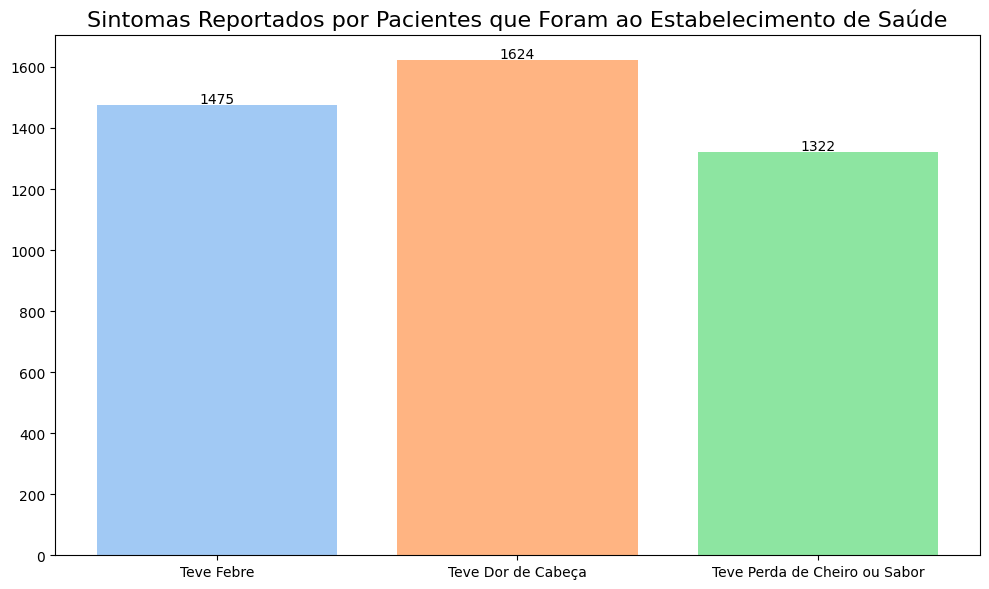

In [ ]:
# Criando as listas
sintomas = ['Teve Febre', 'Teve Dor de Cabeça', 'Teve Perda de Cheiro ou Sabor']
contagem = [
    dados_agrupados_posto_saude['Teve_febre'].values[0],
    dados_agrupados_posto_saude['Teve_dor_de_cabeca'].values[0],
    dados_agrupados_posto_saude['Teve_perda_de_cheiro_ou_sabor'].values[0]
]

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(sintomas, contagem, color=sns.color_palette("pastel", len(sintomas)))

# Rótulo de dados
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 3,
        yval,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Removendo a grade vertical
plt.grid(axis='x', linestyle='', alpha=0.7)

# Título
plt.title('Sintomas Reportados por Pacientes que Foram ao Estabelecimento de Saúde', fontsize=16)

# Exibir o gráfico
plt.tight_layout()
plt.show()


**Restrição de Contato**

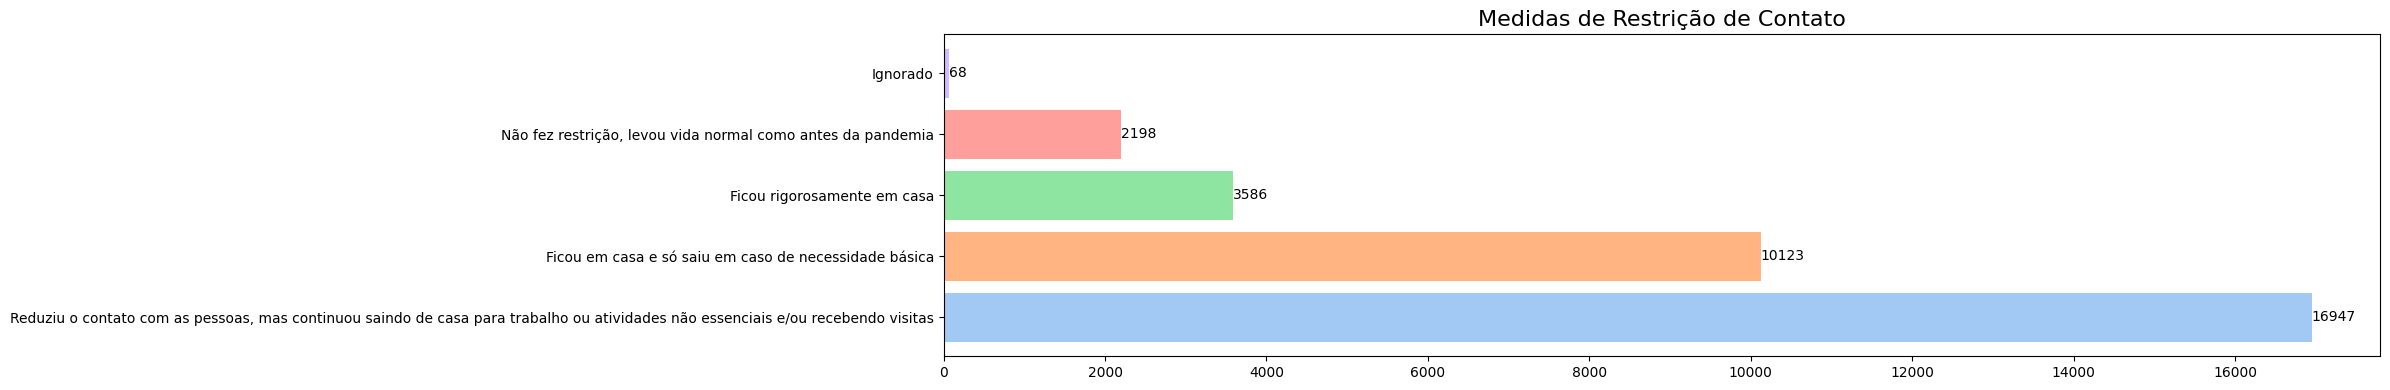

In [ ]:
# Gráfico de barras horizontais
plt.figure(figsize=(24, 4))
bars = plt.barh(dados_agrupados_por_restrição['Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas'],
                 dados_agrupados_por_restrição['count(Em_que_medida_o_a_Sr_a_restringiu_o_contato_com_as_pessoas)'],
                 color=sns.color_palette("pastel", len(dados_agrupados_por_restrição)))

# Rótulo de dados
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        bar.get_width(),
        va='center'
    )

# Título
plt.title('Medidas de Restrição de Contato', fontsize=16)


# Removendo a grade horizontal
plt.grid(axis='y', linestyle='', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Restrições realizadas por Atividade de Trabalho**

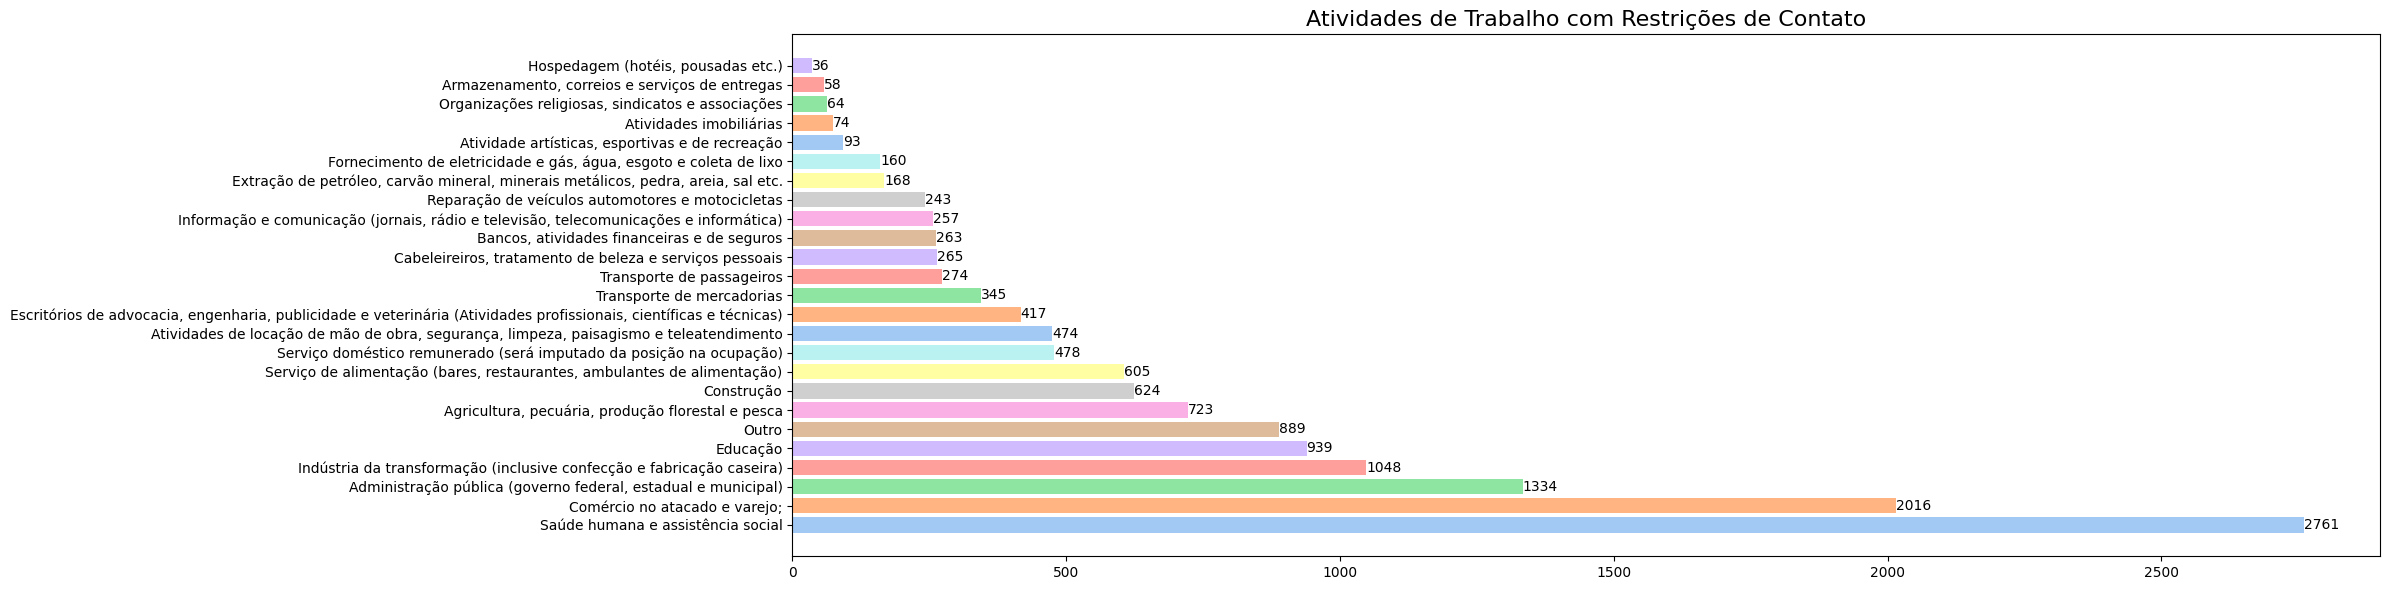

In [ ]:
# Gráfico de barras horizontais
plt.figure(figsize=(24, 6))
bars = plt.barh(dados_agrupados_restrição_trabalho['Principal_atividade_de_trabalho'],
                 dados_agrupados_restrição_trabalho['count(Principal_atividade_de_trabalho)'],
                 color=sns.color_palette("pastel", len(dados_agrupados_restrição_trabalho)))

# Rótulo de dados
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        bar.get_width(),
        va='center'
    )

# Removendo a grade horizontal
plt.grid(axis='y', linestyle='', alpha=0.7)

# Título
plt.title('Atividades de Trabalho com Restrições de Contato', fontsize=16)

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Histórico de trabalho (trabalhou ou fez bico)**

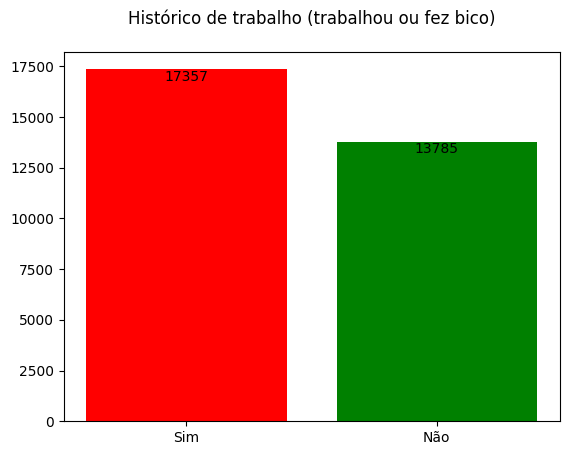

In [ ]:
# Definindo as cores
color_mapping = {
    'Sim': 'red',  # Cor para 'Sim'
    'Não': 'green'  # Cor para 'Não'
}

# Cores
colors = [color_mapping[x] for x in dados_agrupados_qtd_trabalhou['Trabalhou_ou_fez_algum_bico']]

# Gráfico de barras
bars = plt.bar(
    dados_agrupados_qtd_trabalhou['Trabalhou_ou_fez_algum_bico'],
    dados_agrupados_qtd_trabalhou['count(Trabalhou_ou_fez_algum_bico)'],
    color=colors
)

# Rótulo de Dados
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 15,
        yval,
        ha='center',
        va='top',
        fontsize=10,
        color='black'
    )

# Título
plt.title('Histórico de trabalho (trabalhou ou fez bico)', pad=20)

# Remover a grade vertical
plt.grid(axis='x', linestyle='', alpha=0.7)

# Exibindo o gráfico
plt.show()